## Genes clsuter with PCA+tSNE 
similarity as Supplementary Fig 6,7

In [1]:
import sys
sys.path.append('../../scGCO_code/')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
from scGCO_source import *

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

D:\Annconda3\envs\spatial\lib\site-packages\pysal\lib\weights\util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')


In [10]:
j=11
locs, data, _= read_spatial_expression('../../../data/Raw_data/MOB-breast_cancer/Rep11_MOB_count_matrix-1.tsv',
                                      sep='\t')
data_norm = normalize_count_cellranger(data)
print('Rep{}_processing: {}'.format(j, data_norm.shape))

df=read_result_to_dataframe('../../../results/MouseOB/scGCO_results/Rep{}_result_df.csv'.format(j))
gco_genes= df[df.fdr<0.01].index
print(len(gco_genes))

de = pd.read_csv('../../../results/MouseOB/SpatialDE_results/MOB_{}_DE.csv'.format(j))
de_genes = list(set(de.g) & set(data_norm.columns))
print(de.shape)

spark = pd.read_csv('../../../results/MouseOB/SPARK_results/Rep{}_MOB_spark.csv'.format(j))
spark_genes = spark.genes
print(spark.shape)


raw data dim: (262, 16218)
Number of expressed genes a spot must have to be kept (0.01% of total expressed genes) 3375
Marked 3 spots
Removing genes that are expressed in less than 3 spots with a count of at least 1
Dropped 1559 genes
Rep11_processing: (262, 14659)
481
(67, 20)
(772, 3)


Algorithm:  scGCO


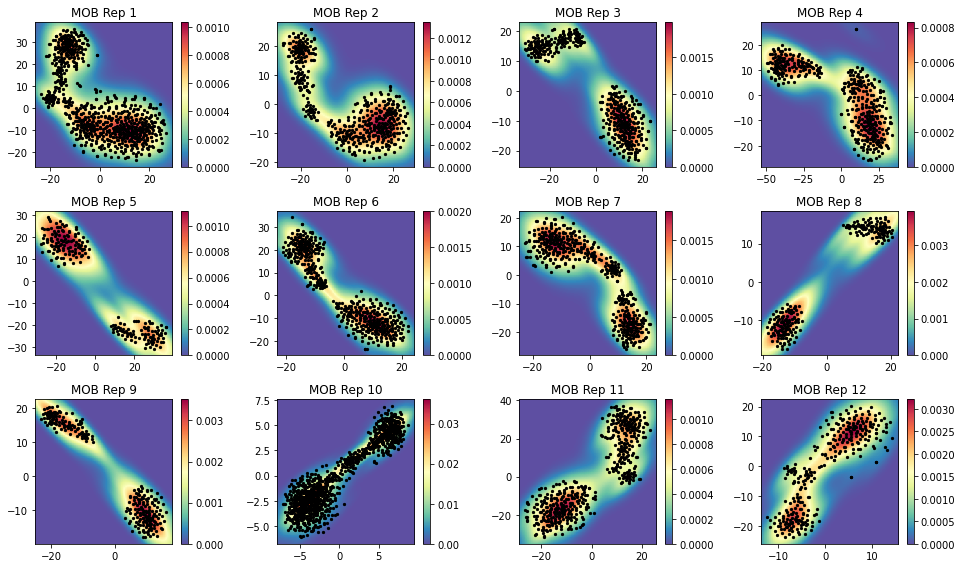

In [11]:
#fig, ax = plt.subplots()
alg = ['scGCO','SPARK','spatialDE']
methods = ['gco_genes', 'spark_genes','de_genes']


nrows=3
ncols=4
fig,axs=plt.subplots(nrows,ncols,figsize=(nrows*4.5,ncols*2))
fig.subplots_adjust(hspace=0.3, wspace=0.45,
                                top=0.925, right=0.925, bottom=0.075, left = 0.075)

for j in np.arange(1,13):
    tsne_df=pd.read_csv('../../../results/MouseOB/scGCO_results/Gene_Cluster//Rep{}_tsne_df_gco_genes.csv'.format(j),
                        index_col=0)

    tsne_proj = np.array([[float(tsne_df.iloc[i,0]), float(tsne_df.iloc[i,1])] for i in range(tsne_df.shape[0])])
#     print(tsne_proj.shape)

    title='MOB Rep {}'.format(j)
    m=int((j-1)/ncols)
    n=(j-1)%ncols
    axes=axs[m,n]

    zz=visualize_tsne_density(tsne_proj,title=title,bins=200,threshold=0.1, ax=axes,fig=fig)
#                                    ,fileName='../../PDF_file/supple_figure/Supple_Fig6_MOB_tsne_spatialDE.pdf')

print('Algorithm: ', alg[0])
plt.tight_layout()
plt.show()

fig.savefig('../../../results/Figure/Supple_Fig3-{}_tsne_genes_Cluster.pdf'.format(alg[0]))